In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("../")
import gran

In [3]:
import re
import pickle
from gzip import GzipFile
from collections import Counter
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np

In [4]:
ngrams_index_url = "http://storage.googleapis.com/books/ngrams/books/datasetsv2.html"
ngrams_index = requests.get(ngrams_index_url)
ngrams_dom = BeautifulSoup(ngrams_index.text)

In [5]:
def find_links(category):
    atags = ngrams_dom.find_all("a", {
        'href': re.compile(f'googlebooks-chi-sim-all-{category}-2012')})
    links = [x.get('href') for x in atags]
    links = [x for x in links if x]
    return links

In [6]:
tc_links = find_links('totalcounts')
ug_links = find_links('1gram')
bg_links = find_links('2gram')
tg_links = find_links('3gram')
qg_links = find_links('4gram')
pg_links = find_links('5gram')

In [7]:
import pandas as pd

In [8]:
tc_data = requests.get(tc_links[0]).text

In [9]:
tc_df = pd.DataFrame.from_records([x.split(',') for x in tc_data.split()], 
                          columns=["year", "match_counts", "page_counts", "volume_counts"])
tc_df = tc_df.astype('int32')
tc_df.set_index('year', inplace=True)

In [10]:
1000 / tc_df.match_counts.sum()

3.723082898309945e-08

## Uni-grams

In [15]:
ug_grams = gran.GoogleNgramData(ug_links, 1)
ug_grams.process()
ug_path = gran.get_cache_path("lang_model", "uni_grams.pkl")
ug_grams.save(ug_path)

In [19]:
Counter(ug_grams.ngdata).most_common(10)

[('', 26859461025),
 ('的', 3511391624),
 ('是', 619146573),
 ('在', 588109412),
 ('了', 562198392),
 ('和', 497854042),
 ('年', 430726648),
 ('一', 421429762),
 ('有', 316246666),
 ('这', 312325138)]

## Bi-Grams

In [ ]:
bg_grams = gran.GoogleNgramData(bg_links, 10000)
bg_grams.process()
bg_path = gran.get_cache_path("lang_model", "bi_grams.pkl")
bg_grams.save(bg_path)

In [ ]:
del bg_grams

## Tri-grams

In [ ]:
tg_grams = gran.GoogleNgramData(tg_links, 1000)
tg_grams.process()
tg_path = gran.get_cache_path("lang_model", "tri_grams.pkl")
tg_grams.save(tg_path)

## Quad-Grams

In [ ]:
qg_grams = gran.GoogleNgramData(qg_links, 100)
qg_grams.process()
qg_path = gran.get_cache_path("lang_model", "quad_grams.pkl")
qg_grams.save(qg_path)

## Five-grams

In [11]:
pg_grams = gran.GoogleNgramData(pg_links, 10)
pg_grams.process()

In [12]:
len(pg_grams.ngdata)

1024

In [15]:
gran.install_data_cache("lang_model")

In [16]:
pg_path = gran.get_cache_path("lang_model", "penta_grams.pkl")

## Bigram sandbox

In [6]:
bg_path = gran.get_cache_path("lang_model", "bi_grams.pkl")

In [7]:
bg_path.exists()

True

In [10]:
with open(bg_path, "rb") as fin:
    bg_data, bg_freq = pickle.load(fin)

In [11]:
len(bg_data)

9173614

In [12]:
len(bg_freq)

40354718

In [15]:
np.quantile(bg_freq, np.linspace(0, 0.05, 1))

array([0.])

In [18]:
np.quantile(bg_freq, [0.5,0.9,0.95, 0.99])

array([  385.,  5240., 13516., 92730.])

In [23]:
wlen_counter = Counter()
i = 0
for bg in tqdm(bg_data.keys()):
    wlen = len(bg)-1
    wlen_counter.update([wlen])
    i = i+1
    # if i > 10000: break

In [24]:
wlen_counter

Counter({2: 636016,
         3: 3669348,
         6: 47470,
         7: 2466,
         4: 4509725,
         5: 308373,
         8: 186,
         9: 21,
         10: 9})

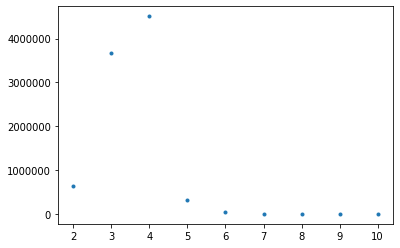

In [28]:
plt.plot(list(wlen_counter.keys()), list(wlen_counter.values()), '.')

In [4]:
import redis

In [6]:
r = redis.Redis("10.0.0.3", port=6379, db=3)

In [7]:
r.dbsize()

7314

In [7]:
r.set("abc", "2343243")

True

In [8]:
r.get("abc")

b'2343243'

In [14]:
r.get(r.keys()[0])

b'85'

In [27]:
r.dbsize()

6175

In [28]:
r.get(r.keys()[3434])

b'1052'

In [24]:
r.flushdb()

True